# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 45
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Check in and security at T5 ...
1,Not Verified | LHR T5 BA Gold Wing worked wel...
2,Not Verified | Very good service on this rout...
3,✅ Trip Verified | Flight mainly let down by ...
4,✅ Trip Verified | Another awful experience b...


In [6]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
import re

# Step 1: Load your dataset
df = pd.read_csv("data/BA_reviews.csv")  # Replace with your actual filename

# Step 2: Define unwanted phrases
unwanted_phrases = [
    r"✅ Trip Verified",         # Example: emojis and phrases
    r"(?i)click here.*",         # Example: links or promotional text
    r"(?i)read more",            # Common filler
    r"\s{2,}",                   # Multiple spaces
]

# Step 3: Function to clean each review
def clean_text(text):
    if pd.isna(text):
        return text
    for phrase in unwanted_phrases:
        text = re.sub(phrase, '', text)
    return text.strip()

# Step 4: Apply cleaning function to the 'review' column
df['reviews'] = df['reviews'].apply(clean_text)

# Step 5: Save the cleaned dataset
df.to_csv("cleaned_reviews.csv", index=False)
print("✅ Data cleaning complete! Saved to 'cleaned_reviews.csv'")


✅ Data cleaning complete! Saved to 'cleaned_reviews.csv'


In [11]:
import pandas as pd

df = pd.read_csv("cleaned_reviews.csv")
df.dropna(subset=["reviews"], inplace=True)  # Drop empty reviews
df.head()


,Unnamed: 0,reviews
0,0,| Check in and security at T5 quick. Both Gall...
1,1,Not Verified |LHR T5 BA Gold Wing worked well....
2,2,Not Verified |Very good service on this route ...
3,3,|Flight mainly let down by a disagreeable flig...
4,4,|Another awful experience by British Airways. ...


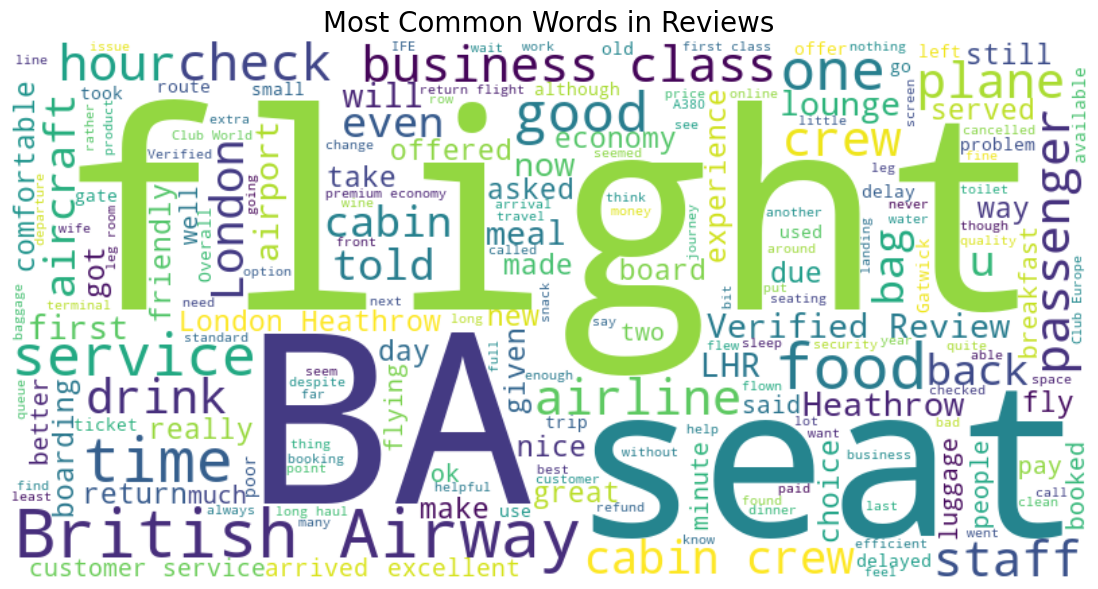

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one big text
all_text = " ".join(df["reviews"])

# Generate and show WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews", fontsize=20)
plt.show()


In [13]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["sentiment"] = df["reviews"].apply(get_sentiment)

# Sentiment classification
df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

df["sentiment_label"].value_counts()


sentiment_label
Positive    2724
Negative    1182
Neutral       21
Name: count, dtype: int64

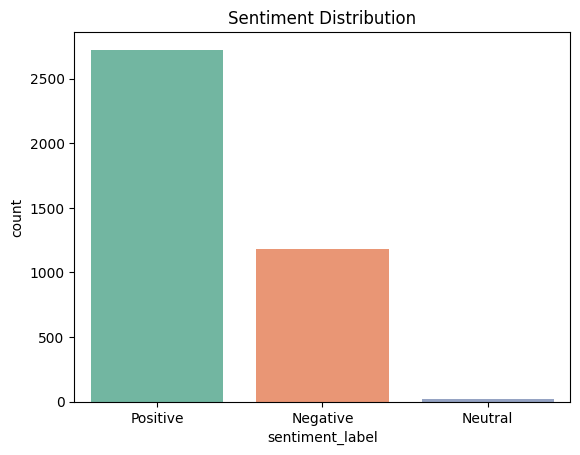

In [15]:
import seaborn as sns

#sns.countplot(data=df, x="sentiment_label", palette="Set2")
sns.countplot(data=df, x="sentiment_label", hue="sentiment_label", palette="Set2", legend=False)
plt.title("Sentiment Distribution")
plt.show()


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert to bag of words
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words per topic
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" | ".join([words[i] for i in topic.argsort()[-10:]]))
    print()

Topic 1:
london | airways | british | ba | served | seat | food | flight | meal | service

Topic 2:
service | seats | class | seat | cabin | food | ba | good | crew | flight

Topic 3:
service | booked | told | seat | seats | customer | british | airways | flight | ba

Topic 4:
service | airport | heathrow | hours | time | check | staff | london | ba | flight

Topic 5:
class | seat | seats | airways | british | food | service | economy | ba | flight



In [18]:
from pathlib import Path
from nbformat import read

# Reload the uploaded Jupyter Notebook after kernel reset
notebook_path = Path("getting_started.ipynb")
with notebook_path.open("r", encoding="utf-8") as f:
    nb = read(f, as_version=4)

# Extract code and markdown cells
code_cells = [cell['source'] for cell in nb.cells if cell.cell_type == 'code']
markdown_cells = [cell['source'] for cell in nb.cells if cell.cell_type == 'markdown']

# Combine for processing
full_code = "\n\n".join(code_cells)
full_markdown = "\n\n".join(markdown_cells)

# Preview content
full_code[:1000], full_markdown[:1000]


('import requests\nfrom bs4 import BeautifulSoup\nimport pandas as pd\n\nbase_url = "https://www.airlinequality.com/airline-reviews/british-airways"\npages = 45\npage_size = 100\n\nreviews = []\n\n# for i in range(1, pages + 1):\nfor i in range(1, pages + 1):\n\n    print(f"Scraping page {i}")\n\n    # Create URL to collect links from paginated data\n    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"\n\n    # Collect HTML data from this page\n    response = requests.get(url)\n\n    # Parse content\n    content = response.content\n    parsed_content = BeautifulSoup(content, \'html.parser\')\n    for para in parsed_content.find_all("div", {"class": "text_content"}):\n        reviews.append(para.get_text())\n    \n    print(f"   ---> {len(reviews)} total reviews")\n\ndf = pd.DataFrame()\ndf["reviews"] = reviews\ndf.head()\n\ndf.to_csv("data/BA_reviews.csv")\n\nimport re\n\n# Step 1: Load your dataset\ndf = pd.read_csv("data/BA_reviews.csv")  # Replace with your